# titanic DB 

## data import 

for this case, we need to installed kagglehub, to import the db direct from kaggle 

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [2]:
# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shuofxz/titanic-machine-learning-from-disaster",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\mateo\AppData\Local\Temp\ipykernel_9016\4010134335.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

also download and save the test file

In [3]:
# Set the path to the file you'd like to load
file_TestPath = "test.csv"

# Load the latest version
Testdf = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shuofxz/titanic-machine-learning-from-disaster",
  file_TestPath,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 test records:", Testdf.head())

C:\Users\mateo\AppData\Local\Temp\ipykernel_9016\1856691445.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  Testdf = kagglehub.load_dataset(


100%|██████████| 28.0k/28.0k [00:00<00:00, 715kB/s]

First 5 test records:    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


Como indica el análisis, la mayoría de columnas son numéricas (int64 o float64), mientras que Name, Sex, Ticket, Cabin y Embarked son de tipo texto

. La variable Age tiene valores faltantes (edad desconocida para 177 pasajeros).

## EDA


veamos las dimensiones : 

In [6]:
df.shape

(891, 12)

y también las 5 filas 

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


de igual manera, es impoortante conocer los tipos de datos y los valores nulos

In [ ]:
df.info()            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


hagamos un análisis univariante: 

primero para ver el porcentaje de supervivientes:

In [9]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

de igual forma para ver la distribución de las edades y entender su curva

<Axes: >

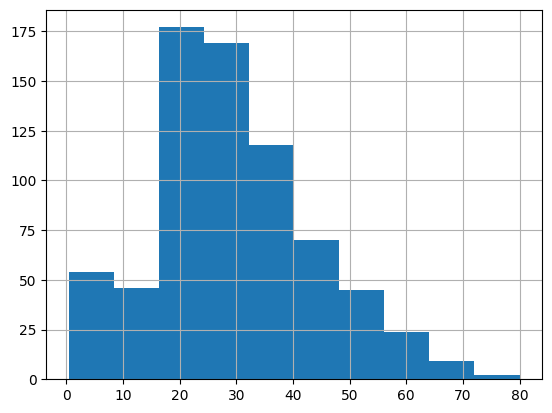

In [10]:
df['Age'].hist()

por ejemplo, para la tarifa, es util conocer la media, mediana y desviacion

In [11]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

de igual forma, es relevante contar los pasajeros por clase

In [12]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

ahora, para el análisis bivariante: 

In [15]:
import pandas as pd

observemos la tasa de supervivencia de hombres y mujeres

In [16]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


y la supervivencia por clase: 

In [18]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


finalmente para visualizar alguna variable contra otra

In [19]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='Age'>

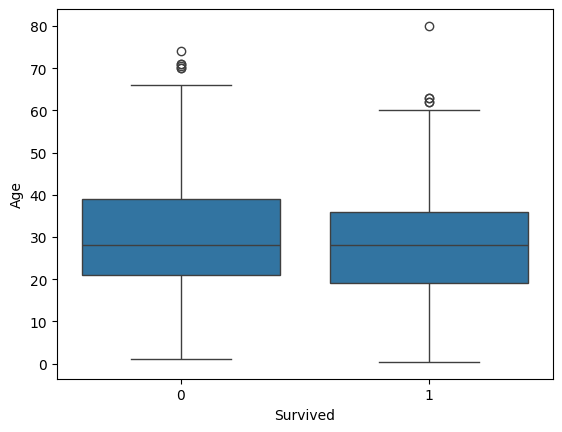

In [20]:
sns.boxplot(x='Survived', y='Age', data=df)

### Conclusiones del EDA 


 
- Las variables más influyentes en la supervivencia son `Sex`, `Pclass`, y `Fare`.
- El dataset presenta correlaciones lógicas entre nivel socioeconómico y supervivencia.
- El PCA muestra que pocas componentes (2–3) explican la mayoría de la variabilidad (~85 %).
- Esto sugiere que el modelo podría beneficiarse de una reducción de dimensionalidad sin gran pérdida de información.


## PCA implementation

## PREPROCESS

## MODELING